In [1]:
from pynq import Overlay
from pynq import Xlnk
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
ol=Overlay('LeNet_wrapper.bit')
LeNet_ip = ol.lenet_0

In [3]:
#################
###Sample Test###
#################



length_in = 28
length_out = 10

inpt=Xlnk().cma_array(shape=(1,length_in,length_in),dtype=np.float32)
outpt=Xlnk().cma_array(shape=(length_out,),dtype=np.float32)

image_in = np.zeros(shape=(1,28,28))
with open("image_7_in.dat","r") as f:
    data = f.read().split()

data = np.array(data)
data = data.astype(float)

idx=0
for i in range(len(data)):
    if(i%28 == 0):
        idx+=1
    image_in[0][idx-1][i%28] = data[i]

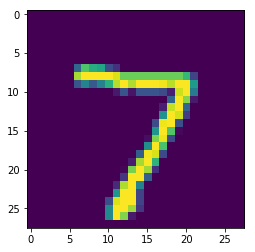

In [4]:
plt.imshow(image_in[0])

In [5]:
np.copyto(inpt,image_in)

In [6]:
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

In [7]:
print(outpt)

[  4.63486020e-13   1.01826032e-07   4.58718130e-09   8.35838954e-09
   4.61095953e-11   4.64685765e-14   4.27037549e-20   9.99999881e-01
   6.89654844e-12   4.16139706e-10]


In [8]:
print("Prediction: " + str(np.where(np.round(outpt) == 1)[0][0]))

Prediction: 7


In [10]:
##############
###Test Set###
##############

x_test = np.load("testset_x.dat.npy")
y_test = np.load("testset_y.dat.npy")
print("Testset input size: " + str(x_test.shape))
print("Testset label size: " + str(y_test.shape))

Testset input size: (10000, 1, 28, 28)
Testset label size: (10000, 10)


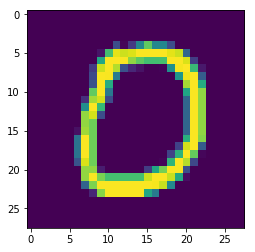

In [72]:
test_id=10
image_in = np.zeros(shape=(1,28,28))
image_in = x_test[test_id]

np.copyto(inpt,image_in)
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

plt.imshow(image_in[0])

In [73]:
print("Prediction: " + str(np.argmax(outpt)))
print("Golden: " + str(np.argmax(y_test[test_id])))

Prediction: 0
Golden: 0


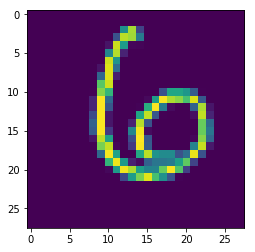

In [74]:
test_id=100
image_in = np.zeros(shape=(1,28,28))
image_in = x_test[test_id]

np.copyto(inpt,image_in)
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

plt.imshow(image_in[0])

In [75]:
print("Prediction: " + str(np.argmax(outpt)))
print("Golden: " + str(np.argmax(y_test[test_id])))

Prediction: 6
Golden: 6


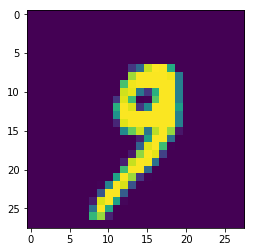

In [83]:
test_id=1000
image_in = np.zeros(shape=(1,28,28))
image_in = x_test[test_id]

np.copyto(inpt,image_in)
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

plt.imshow(image_in[0])

In [84]:
print("Prediction: " + str(np.argmax(outpt)))
print("Golden: " + str(np.argmax(y_test[test_id])))

Prediction: 9
Golden: 9


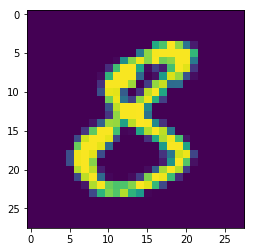

In [87]:
test_id=1234
image_in = np.zeros(shape=(1,28,28))
image_in = x_test[test_id]
np.copyto(inpt,image_in)
LeNet_ip.write(0x10,inpt.physical_address)
LeNet_ip.write(0x18,outpt.physical_address)
LeNet_ip.write(0x00,1)

plt.imshow(image_in[0])

In [88]:
print("Prediction: " + str(np.argmax(outpt)))
print("Golden: " + str(np.argmax(y_test[test_id])))

Prediction: 8
Golden: 8


In [79]:
###########################
### Runtime Measurement ###
###########################

image_in = np.zeros(shape=(1,28,28))

test_size=10000
tot_time=0

preds=np.zeros(test_size)
for x in range(test_size):
    image_in = x_test[x]
    
    np.copyto(inpt,image_in)
    LeNet_ip.write(0x10,inpt.physical_address)
    LeNet_ip.write(0x18,outpt.physical_address)

    v=time.time()
    LeNet_ip.write(0x00,1)
    tot_time += time.time()-v

print("Total Time taken for {} test images: ".format(test_size) + str(tot_time))

Total Time taken for 10000 test images: 0.39685750007629395
